In [1]:
from keras.applications import VGG16
import os,sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras import optimizers
import time
import glob
import cv2

Using TensorFlow backend.
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflo

In [2]:
from keras import backend as K

if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [3]:
model_file_name = 'model_SDNET2018_256.hdf5'
model = load_model('./model/' + model_file_name)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


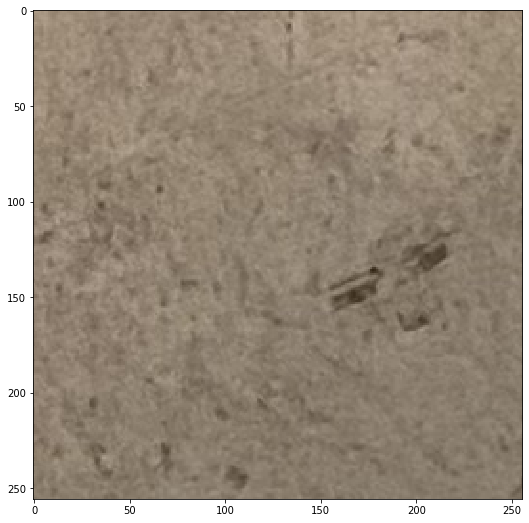

In [12]:
folder = os.listdir("./data/slice_crack/real_crack/")
dense_size = len(folder)

crack = []
label = []
for index, name in enumerate(folder):
    dir = "./data/slice_crack/real_crack/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        crack.append(data)
        label.append(index)
crack = np.array(crack)
label = np.array(label)
crack = crack.astype('float32')
crack = crack / 255.0

print(label)
fig = plt.figure(figsize=(16,9))
plt.imshow(crack[2])
plt.show()
label = np_utils.to_categorical(label,dense_size)

fp_dir = './data/slice_crack/fp/'
fn_dir = './data/slice_crack/fn/'
if os.path.exists(fp_dir)==False:os.mkdir(fp_dir)
if os.path.exists(fn_dir)==False:os.mkdir(fn_dir)

In [7]:
"""
fp = []
fn = []
a = np_utils.to_categorical(1, dense_size)
    

for i in range(len(fp)):
    im = (X_test[fp[i]]*255)
    img = Image.fromarray(np.uint8(im))
    img.save(fp_dir + '{}.jpg'.format(i))   
"""

score = model.evaluate(crack, label, verbose=1)
print("evaluate loss: {0[0]}".format(score))
print("evaluate acc: {0[1]}".format(score))

121/121 [==============================] - 3s 24ms/step
evaluate loss: 2.8087436896710356
evaluate acc: 0.19834710743801653
